In [10]:
#initialize packages 


import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [12]:
#load data 

data = pd.read_csv("modeldata_final1.csv")


# Split the data into input features (X) and target variable (y)
X = data.drop('Activity', axis=1)  # Input features
X = X.iloc[:, 2:]
#X = X.drop("Unnamed: 24", axis=1)
#X = X.drop("human", axis = 1)
#X= X[:10000]
y = data['Activity'] # Target variable

feature_names = X.columns.values.tolist()
print(feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9)

print(X_test)


['void--ego-vehicle', 'object--vehicle--bus', 'object--traffic-light--general-upright-back', 'marking--discrete--stop-line', 'information--general-directions--g1', 'marking--discrete--arrow--left', 'marking--discrete--symbol--bicycle', 'object--banner', 'object--traffic-light--pedestrians-side', 'object--traffic-light--pedestrians-front', 'object--traffic-light--general-upright', 'object--traffic-light--general-upright-side', 'object--catch-basin', 'construction--flat--traffic-island', 'object--vehicle--truck', 'regulatory--keep-right--g1', 'construction--flat--driveway', 'regulatory--no-stopping--g1', 'marking--discrete--other-marking', 'construction--flat--bike-lane', 'construction--barrier--wall', 'object--traffic-sign--direction-front', 'object--junction-box', 'void--ground', 'object--traffic-light--general-upright-front', 'human--rider--bicyclist', 'marking--continuous--solid', 'marking--discrete--crosswalk-zebra', 'object--wire-group', 'object--manhole', 'object--trash-can', 'obj

# Random grid search 

In [13]:
rfc = RandomForestClassifier(random_state=42)
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [14]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 400, num = 60)]

# Number of features to consider at every split
max_features = ['sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 60)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True]

max_samples = [0.4,0.5,0.6,0.7,0.8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'max_samples': max_samples}
print(random_grid)

{'n_estimators': [10, 16, 23, 29, 36, 43, 49, 56, 62, 69, 76, 82, 89, 95, 102, 109, 115, 122, 128, 135, 142, 148, 155, 162, 168, 175, 181, 188, 195, 201, 208, 214, 221, 228, 234, 241, 247, 254, 261, 267, 274, 281, 287, 294, 300, 307, 314, 320, 327, 333, 340, 347, 353, 360, 366, 373, 380, 386, 393, 400], 'max_features': ['sqrt'], 'max_depth': [10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 42, 43, 45, 46, 48, 49, 51, 52, 54, 55, 57, 58, 60, 61, 63, 64, 66, 67, 69, 71, 72, 74, 75, 77, 78, 80, 81, 83, 84, 86, 87, 89, 90, 92, 93, 95, 96, 98, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True], 'max_samples': [0.4, 0.5, 0.6, 0.7, 0.8]}


In [15]:

#https://www.kaggle.com/code/prashant111/random-forest-classifier-feature-importance
#https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285

#Initialize the model 

rfc = RandomForestClassifier(random_state=42)
k = 5

#Initialize the randomizedSeachCV using the parameter grid and model 
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 300, cv = k, verbose=0, random_state=42, n_jobs = -1)

X_train_val = X_train + X_valid
y_train_val = y_train + y_valid

# Fit the random search model
rfc_random.fit(X_train, y_train)

best_iteration_indices = []
parameters_for_grid = {'n_estimators': [],
               'max_features': [],
               'max_depth': [],
               'min_samples_split': [],
               'min_samples_leaf': [],
               'bootstrap': [],
                'max_samples': []}

#print(rfc_random.cv_results_) 
for i in range(0,k):
    print(f"Fold {i+1}:")
    best_value = np.argmax(rfc_random.cv_results_[f"split{i}_test_score"])
    best_iteration_indices.append(best_value)
    best_accuracy = rfc_random.cv_results_[f"split{i}_test_score"][best_value]
    best_params = rfc_random.cv_results_['params'][best_value]
    for key in best_params:
        if best_params[key] not in parameters_for_grid[key]:
            parameters_for_grid[key].append(best_params[key])
    #mean_accuracy = rfc_random.cv_results_['mean_test_score'][best_value]
    print(f"Best Accuracy in fold {i+1}:", best_accuracy)
    print("Best Parameter:", best_params)
    print("Indices for best accuracy in fold:", best_value)
    #print(f"Mean Accuracy in fold {i+1}:", mean_accuracy)
    print()


mean_test_rand = []    
for i in best_iteration_indices:
    mean_accuracy = rfc_random.cv_results_["mean_test_score"][i]
    mean_test_rand.append(mean_accuracy)
    print(f"Mean test score across folds for candidate {i}:", mean_accuracy)
    
print(best_iteration_indices)
#print(rfc_random.cv_results_)    
#Predict and confusion matrix    
    
pred = rfc_random.predict(X_test)

accuracy_score(y_test,pred)

print(confusion_matrix(y_test,pred))



Fold 1:
Best Accuracy in fold 1: 0.5049261083743842
Best Parameter: {'n_estimators': 353, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_samples': 0.4, 'max_features': 'sqrt', 'max_depth': 14, 'bootstrap': True}
Indices for best accuracy in fold: 99

Fold 2:
Best Accuracy in fold 2: 0.491530643671081
Best Parameter: {'n_estimators': 221, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_samples': 0.6, 'max_features': 'sqrt', 'max_depth': 14, 'bootstrap': True}
Indices for best accuracy in fold: 61

Fold 3:
Best Accuracy in fold 3: 0.4804434862950416
Best Parameter: {'n_estimators': 267, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_samples': 0.5, 'max_features': 'sqrt', 'max_depth': 63, 'bootstrap': True}
Indices for best accuracy in fold: 140

Fold 4:
Best Accuracy in fold 4: 0.4961502925777641
Best Parameter: {'n_estimators': 221, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_samples': 0.5, 'max_features': 'sqrt', 'max_depth': 14, 'bootstrap': True}
Indices for b

In [16]:
print(parameters_for_grid['n_estimators'])
n_estimaters_grid = []
n_estimaters_grid.append(round(np.quantile(parameters_for_grid['n_estimators'], 0)))
n_estimaters_grid.append(round(np.quantile(parameters_for_grid['n_estimators'], 0.25)))
n_estimaters_grid.append(round(np.quantile(parameters_for_grid['n_estimators'], 0.5)))
n_estimaters_grid.append(round(np.quantile(parameters_for_grid['n_estimators'], 0.75)))
n_estimaters_grid.append(round(np.quantile(parameters_for_grid['n_estimators'], 1)))


max_depth_grid = []
max_depth_grid.append(round(np.quantile(parameters_for_grid['max_depth'], 0)))
max_depth_grid.append(round(np.quantile(parameters_for_grid['max_depth'], 0.25)))
max_depth_grid.append(round(np.quantile(parameters_for_grid['max_depth'], 0.5)))
max_depth_grid.append(round(np.quantile(parameters_for_grid['max_depth'], 0.75)))
max_depth_grid.append(round(np.quantile(parameters_for_grid['max_depth'], 1)))


print(max_depth_grid)

[353, 221, 267, 168]
[14, 37, 60, 62, 63]


# Grid search 

In [17]:
# Create the parameter grid based on the results of random search 

grid_grid = {
    'bootstrap': parameters_for_grid['bootstrap'],
    'max_depth': parameters_for_grid['max_depth'],
    'max_features': ['sqrt'],
    'min_samples_leaf': parameters_for_grid['min_samples_leaf'],
    'min_samples_split': parameters_for_grid['min_samples_split'],
    'n_estimators': parameters_for_grid['n_estimators'],
    'max_samples': parameters_for_grid['max_samples']
}
print(grid_grid)

rfc = RandomForestClassifier(random_state=42)
k = 5 

rfc_grid = GridSearchCV(estimator = rfc, param_grid = grid_grid, 
                          cv = k, n_jobs = -1, verbose = 0)

rfc_grid.fit(X_train, y_train)

best_iteration_indices_grid = []

 
for i in range(0,k):
    print(f"Fold {i+1}:")
    best_value = np.argmax(rfc_grid.cv_results_[f"split{i}_test_score"])
    best_iteration_indices_grid.append(best_value)
    best_accuracy = rfc_grid.cv_results_[f"split{i}_test_score"][best_value]
    best_params = rfc_grid.cv_results_['params'][best_value]
    #mean_accuracy = rfc_random.cv_results_['mean_test_score'][best_value]
    print(f"Best Accuracy in fold {i+1}:", best_accuracy)
    print("Best Parameter:", best_params)
    print("Indices for best accuracy in fold:", best_value)
    #print(f"Mean Accuracy in fold {i+1}:", mean_accuracy)

print(best_iteration_indices_grid)

mean_test_grid = []
for i in best_iteration_indices_grid:
    mean_accuracy = rfc_grid.cv_results_["mean_test_score"][i]
    mean_test_grid.append(mean_accuracy)
    print(f"Mean test score across folds for candidate {i}:", mean_accuracy)
    

    
pred_grid = rfc_grid.predict(X_test)

accuracy_score(y_test,pred)

print(confusion_matrix(y_test,pred_grid))


print(5*(len(parameters_for_grid['bootstrap'])*len(parameters_for_grid['max_depth'])*len(parameters_for_grid['min_samples_leaf'])*len(parameters_for_grid['min_samples_split'])*len(parameters_for_grid['n_estimators'])*len(parameters_for_grid['max_samples'])))


{'bootstrap': [True], 'max_depth': [14, 63, 60], 'max_features': ['sqrt'], 'min_samples_leaf': [2, 4, 1], 'min_samples_split': [5, 10, 2], 'n_estimators': [353, 221, 267, 168], 'max_samples': [0.4, 0.6, 0.5]}
Fold 1:
Best Accuracy in fold 1: 0.5049261083743842
Best Parameter: {'bootstrap': True, 'max_depth': 14, 'max_features': 'sqrt', 'max_samples': 0.4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 353}
Indices for best accuracy in fold: 0
Fold 2:
Best Accuracy in fold 2: 0.491530643671081
Best Parameter: {'bootstrap': True, 'max_depth': 14, 'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 221}
Indices for best accuracy in fold: 53
Fold 3:
Best Accuracy in fold 3: 0.4819833692639359
Best Parameter: {'bootstrap': True, 'max_depth': 63, 'max_features': 'sqrt', 'max_samples': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 168}
Indices for best accuracy in fold: 191
Fold 4:
Best Accuracy in f

# Model 

Test set accuracy: 0.48957871396895786
Out of bag score 0.48016752894801673
Out of bag decision function [[0.3316326  0.33015001 0.33821739]
 [0.39121885 0.34735072 0.26143043]
 [0.44368998 0.33984238 0.21646764]
 ...
 [0.45067544 0.34266015 0.20666441]
 [0.19418197 0.33939877 0.46641926]
 [0.54498557 0.32860378 0.12641065]]
16236
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': 0.6, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 221, 'n_jobs': None, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}
Confusion matrix random search: 
 [[903 219 358]
 [605 389 500]
 [392 228 916]]
Model feature importances: [0.06255626294582299, 0.04283189865766241, 0.04061025597491987, 0.03782408404165998, 0.0343700618319426, 0.032901658575185906, 0.03217247631718114, 0.0321371512643263, 0.

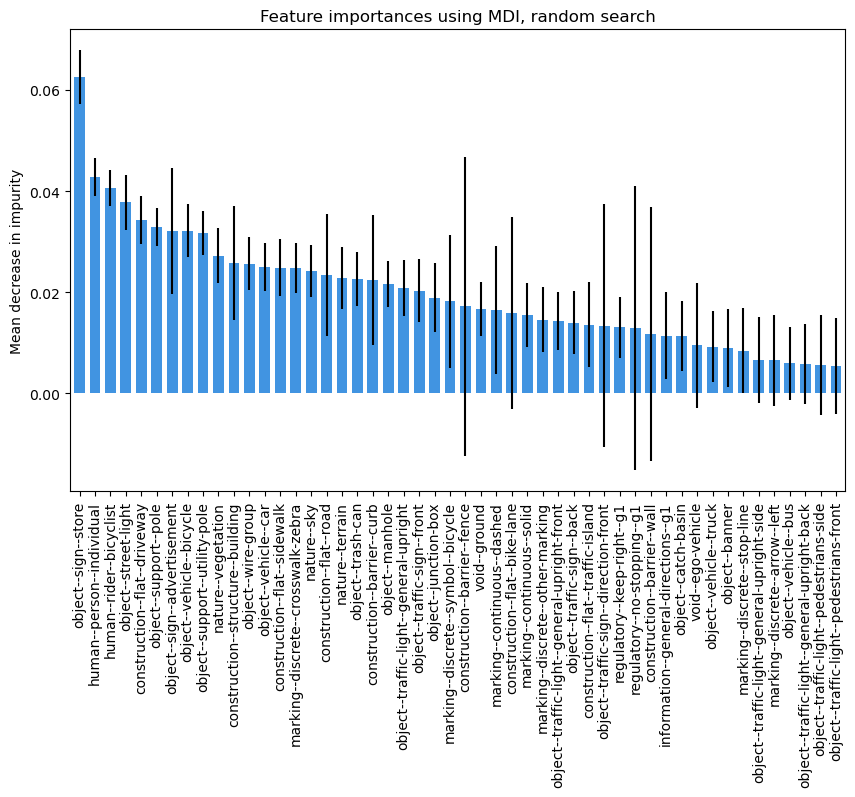

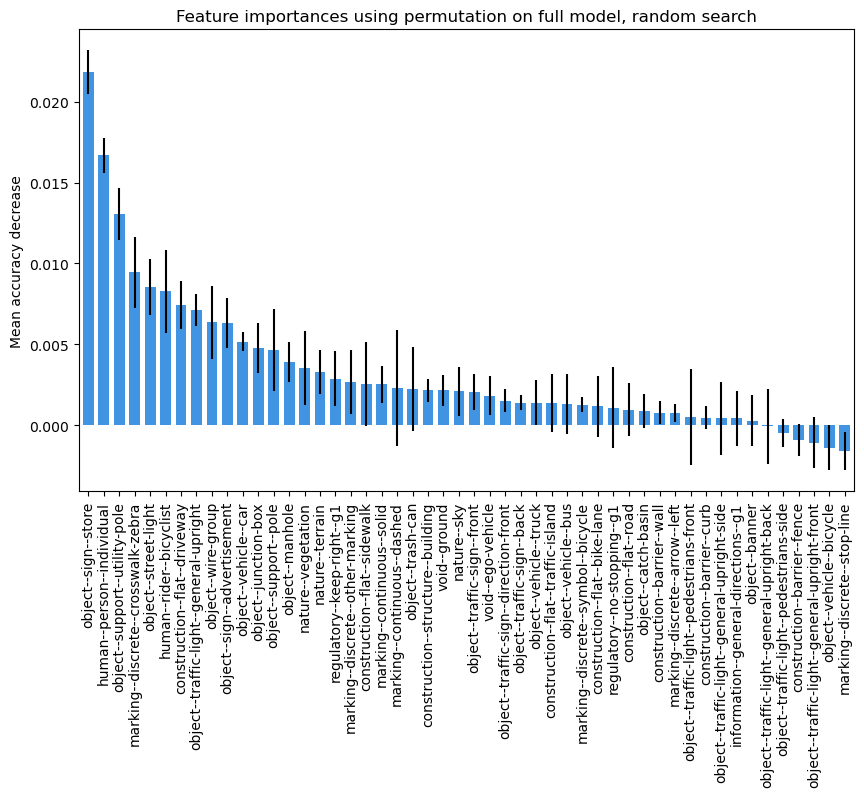

object--sign--store           0.022 +/- 0.003
human--person--individual     0.017 +/- 0.004
object--support--utility-pole 0.013 +/- 0.003
marking--discrete--crosswalk-zebra0.009 +/- 0.003
object--street-light          0.009 +/- 0.002
human--rider--bicyclist       0.008 +/- 0.003
construction--flat--driveway  0.007 +/- 0.001
object--traffic-light--general-upright0.007 +/- 0.002
object--wire-group            0.006 +/- 0.002
object--sign--advertisement   0.006 +/- 0.002
object--vehicle--car          0.005 +/- 0.002
object--junction-box          0.005 +/- 0.002
nature--terrain               0.003 +/- 0.001
construction--structure--building0.002 +/- 0.001
void--ground                  0.002 +/- 0.001


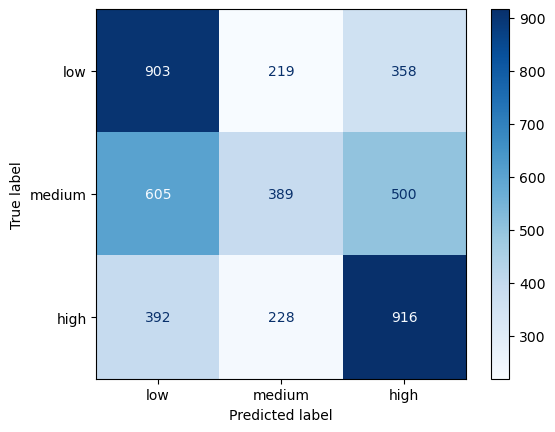

[0 1 2]


In [18]:
#split data

#define parameters

#random 

best_test = np.argmax(mean_test_rand)
best_test_i = best_iteration_indices[best_test]
best_param = rfc_random.cv_results_['params'][best_test_i]

model_rand = RandomForestClassifier(**best_param,oob_score=True)
model_rand.fit(X_train, y_train)

y_pred_rand = model_rand.predict(X_test)

# Evaluate the model's performance on the test set
accuracy_rand = accuracy_score(y_test, y_pred_rand)
print("Test set accuracy:", accuracy_rand)
print("Out of bag score", model_rand.oob_score_)
print("Out of bag decision function", model_rand.oob_decision_function_)
print(len(model_rand.oob_decision_function_))
print(model_rand.get_params())

print("Confusion matrix random search: \n",  confusion_matrix(y_test,y_pred_rand))


print("Model feature importances:", sorted(model_rand.feature_importances_,reverse=True))
print("Model feature importances names:", [model_rand.feature_names_in_[i] for i in sorted(range(len(model_rand.feature_importances_)), key=lambda k: model_rand.feature_importances_[k], reverse=True)])


importances = model_rand.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rand.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
sorted_importances = forest_importances.sort_values(ascending=False)  # Sorting the importances

sorted_feature_names = sorted_importances.index  # Sorting the feature names based on importances

fig, ax = plt.subplots(figsize=(10, 6))
sorted_importances.plot.bar(yerr=std[sorted_importances.index.get_indexer(sorted_feature_names)], ax=ax, color=["#4194E1"],width =0.7)  # Using sorted importances and corresponding std
ax.set_title("Feature importances using MDI, random search")
ax.set_ylabel("Mean decrease in impurity")
plt.show()


from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_rand, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

forest_importances_perm = pd.Series(result.importances_mean, index=feature_names)

sorted_importances_perm = forest_importances_perm.sort_values(ascending=False)  # Sorting the importances

sorted_feature_names_perm = forest_importances_perm.index  # Sorting the feature names based on importances


#print(result)    
fig, ax = plt.subplots(figsize=(10, 6))
sorted_importances_perm.plot.bar(yerr=result.importances_std[sorted_importances_perm.index.get_indexer(sorted_feature_names_perm)], ax=ax, color=["#4194E1"], width =0.7)
ax.set_title("Feature importances using permutation on full model, random search")
ax.set_ylabel("Mean accuracy decrease")
plt.show()



for i in result.importances_mean.argsort()[::-1]:
     if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"{feature_names[i]:<30}"
               f"{result.importances_mean[i]:.3f}"
              f" +/- {result.importances_std[i]:.3f}")
        
cm_rand = confusion_matrix(y_test, y_pred_rand, labels=model_rand.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rand,display_labels=["low","medium","high"])
disp.plot(cmap='Blues')
plt.show()

print(model_rand.classes_)

Test set accuracy: 0.4886917960088692
Out of bag score 0.4833086967233309
Out of bag decision function [[0.32874774 0.33204501 0.33920726]
 [0.39453717 0.3500535  0.25540933]
 [0.44702512 0.34406493 0.20890995]
 ...
 [0.44604124 0.34645044 0.20750832]
 [0.15463617 0.28715107 0.55821275]
 [0.54591737 0.30952577 0.14455685]]
16236
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': 0.6, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 221, 'n_jobs': None, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}
Confusion matrix gridsearch: 
 [[889 243 348]
 [610 399 485]
 [395 225 916]]
Model feature importances: [0.06373882943793165, 0.04137788890815883, 0.03861109339316121, 0.03767655791218672, 0.03473864371836692, 0.034413325020704065, 0.0328154986658669, 0.03270407632735622, 0.0321

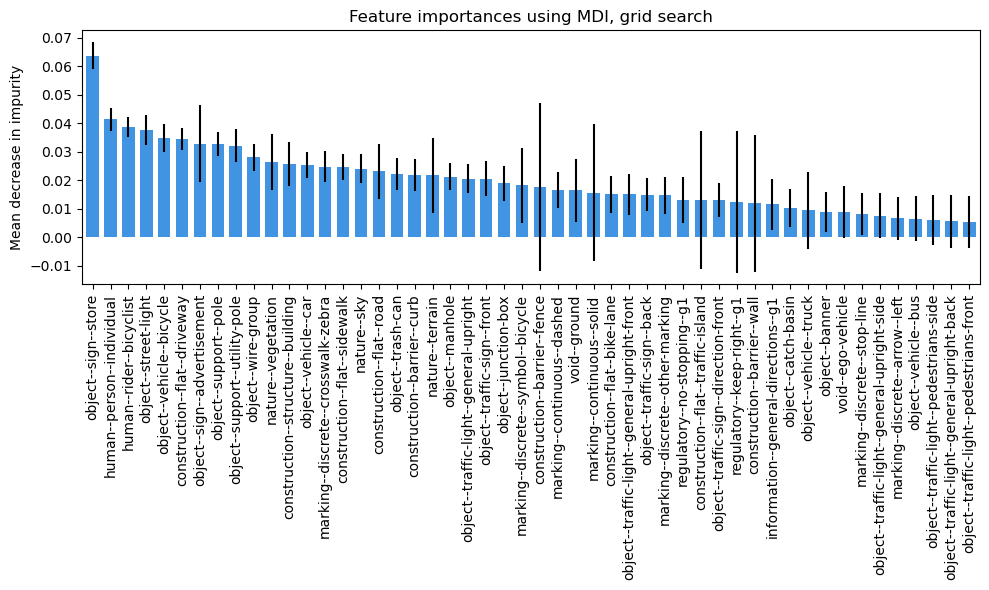

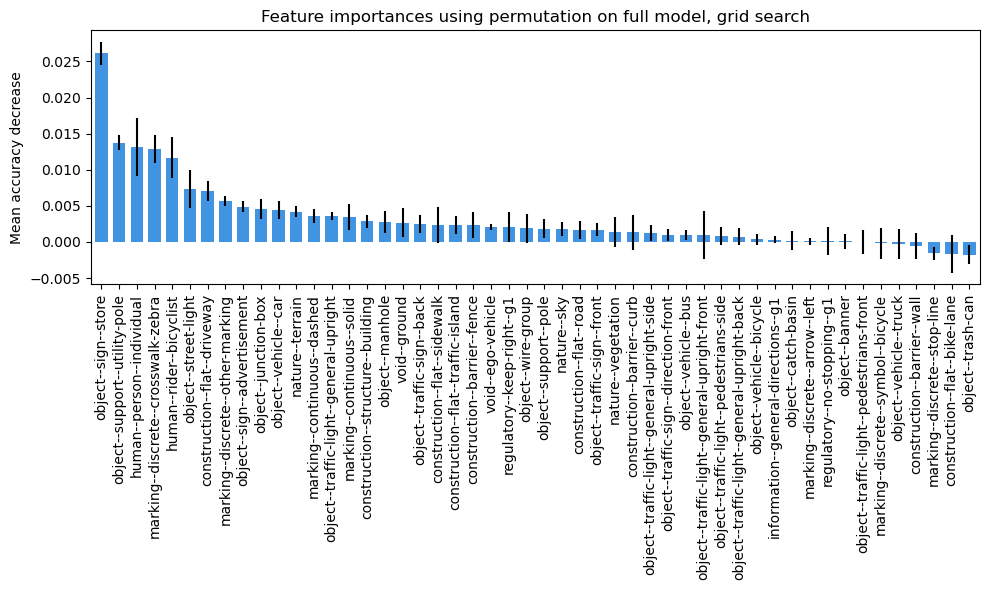

object--sign--store           0.026 +/- 0.004
object--support--utility-pole 0.014 +/- 0.003
human--person--individual     0.013 +/- 0.003
marking--discrete--crosswalk-zebra0.013 +/- 0.002
human--rider--bicyclist       0.012 +/- 0.003
object--street-light          0.007 +/- 0.002
construction--flat--driveway  0.007 +/- 0.002
marking--discrete--other-marking0.006 +/- 0.001
object--junction-box          0.005 +/- 0.002
object--vehicle--car          0.004 +/- 0.001
nature--terrain               0.004 +/- 0.001
marking--continuous--solid    0.003 +/- 0.001
construction--structure--building0.003 +/- 0.001
void--ground                  0.003 +/- 0.001
object--traffic-sign--back    0.002 +/- 0.001
construction--flat--sidewalk  0.002 +/- 0.001
construction--barrier--fence  0.002 +/- 0.001


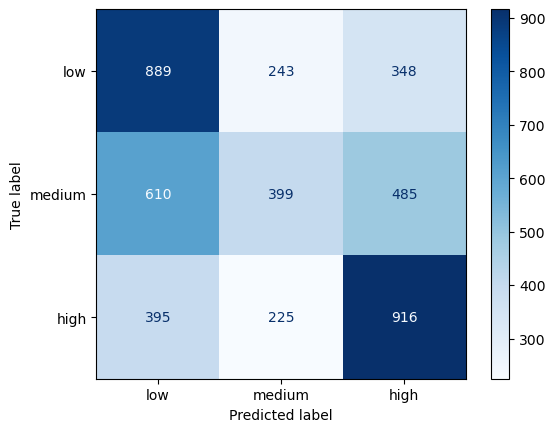

In [19]:
#Grid

best_test = np.argmax(mean_test_grid)
best_test_i = best_iteration_indices_grid[best_test]
best_param_grid = rfc_grid.cv_results_['params'][best_test_i]

model_grid = RandomForestClassifier(**best_param_grid,oob_score=True)
model_grid.fit(X_train, y_train)

y_pred_grid = model_grid.predict(X_test)

# Evaluate the model's performance on the test set
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print("Test set accuracy:", accuracy_grid)
print("Out of bag score", model_grid.oob_score_)
print("Out of bag decision function", model_grid.oob_decision_function_)
print(len(model_grid.oob_decision_function_))
print(model_grid.get_params())

print("Confusion matrix gridsearch: \n", confusion_matrix(y_test,y_pred_grid))

print("Model feature importances:", sorted(model_grid.feature_importances_,reverse=True))
print("Model feature importances names:", [model_grid.feature_names_in_[i] for i in sorted(range(len(model_rand.feature_importances_)), key=lambda k: model_rand.feature_importances_[k], reverse=True)])

importances = model_grid.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_grid.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
sorted_importances = forest_importances.sort_values(ascending=False)  # Sorting the importances

sorted_feature_names = sorted_importances.index  # Sorting the feature names based on importances

fig, ax = plt.subplots(figsize=(10, 6))
sorted_importances.plot.bar(yerr=std[sorted_importances.index.get_indexer(sorted_feature_names)], ax=ax,color=["#4194E1"],width =0.7)  # Using sorted importances and corresponding std
ax.set_title("Feature importances using MDI, grid search")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()


from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_grid, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

forest_importances_perm = pd.Series(result.importances_mean, index=feature_names)

sorted_importances_perm = forest_importances_perm.sort_values(ascending=False)  # Sorting the importances

sorted_feature_names_perm = forest_importances_perm.index  # Sorting the feature names based on importances


#print(result)    
fig, ax = plt.subplots(figsize=(10, 6))
sorted_importances_perm.plot.bar(yerr=result.importances_std[sorted_importances_perm.index.get_indexer(sorted_feature_names_perm)], ax=ax,color=["#4194E1"],width =0.7)
ax.set_title("Feature importances using permutation on full model, grid search")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()



for i in result.importances_mean.argsort()[::-1]:
     if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"{feature_names[i]:<30}"
               f"{result.importances_mean[i]:.3f}"
              f" +/- {result.importances_std[i]:.3f}")
        
cm_grid = confusion_matrix(y_test, y_pred_grid, labels=model_grid.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_grid,display_labels=["low","medium","high"])
disp.plot(cmap='Blues')
plt.show()

In [20]:
import scipy.stats as st

n_samples = 100

baseline_score = []

for i in range(0,n_samples):
    
    boot_sample = list(np.random.choice(y_test,size=len(y_test),replace=True))
    
    low = boot_sample.count(0)
    med = boot_sample.count(1)
    high = boot_sample.count(2)
    
    freq = [low/len(y_test),med/len(y_test),high/len(y_test)]
    most_freq = max(freq)
    baseline_score.append(most_freq)

#print(np.mean(baseline_score))
interval = st.t.interval(confidence=0.95, df=len(baseline_score)-1, loc=np.mean(baseline_score), scale=st.sem(baseline_score)) 

print("The accuracy of the random model is:", accuracy_rand)
print("The accuracy of the grid model is:", accuracy_grid)
print("The confidence interval of the baseline is:", interval)
print("The mean of the accuracy of the baseline is:", np.mean(baseline_score))


if interval[0] <= accuracy_rand <= interval[1]:
    print("The accuracy of the random model is within the confidence interval for the baseline")
elif accuracy_rand <= interval[0]:
    print("The accuracy of the random model is worse than the baseline")
else:
    print("The accuracy of the random model is is higher than the upper confidence interval for the baseline \n and thereby performs better")


    
if interval[0] <= accuracy_grid <= interval[1]:
    print("The accuracy of the grid model is within the confidence interval for the baseline")
elif accuracy_grid <= interval[0]:
    print("The accuracy of the grid model is worse than the baseline")
else:
    print("The accuracy of the grid model is higher than the upper confidence interval for the baseline \n and thereby performs better")




The accuracy of the random model is: 0.48957871396895786
The accuracy of the grid model is: 0.4886917960088692
The confidence interval of the baseline is: (0.3412374364938601, 0.34301533512476495)
The mean of the accuracy of the baseline is: 0.34212638580931254
The accuracy of the random model is is higher than the upper confidence interval for the baseline 
 and thereby performs better
The accuracy of the grid model is higher than the upper confidence interval for the baseline 
 and thereby performs better
